
 Andmestiku tunnused:
Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MonthlyCharges_categories'],
      dtype='object')
Andmestikus on 21 veergu

 Näidis andmestiku välimusest:
      gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
5827    Male              0     Yes        Yes      34          Yes   
1442  Female              0     Yes        Yes      52          Yes   
983     Male              0      No         No       1          Yes   
144     Male              1     Yes         No      71          Yes   
5716    Male              0      No        Yes       2          Yes   

     MultipleLines InternetService       OnlineSecurity         OnlineBackup  \
5827           Ye

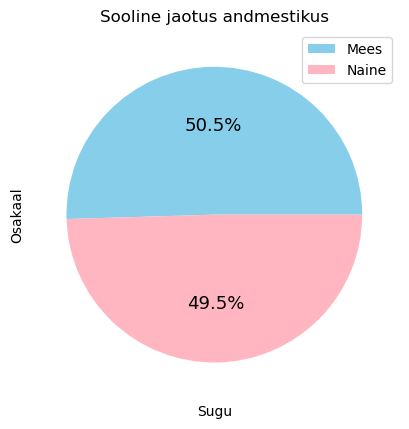

On näha, et naised ja mehed jaotuvad üsnagi võrdselt

Kui suur osakaal klientidest on pensionärid?


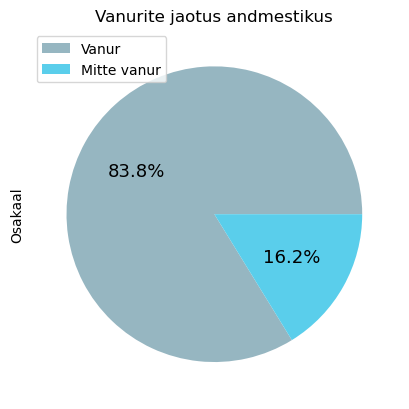


Nähtav, et antud firma kliendid on suuremjaolt pensionärid

Uurime ka kuidas jaotuvad partnerite ja ülalpeetavatega kliendid: 


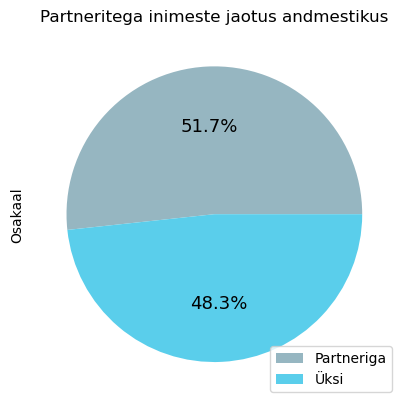

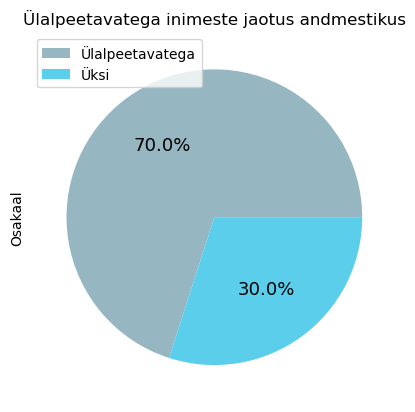

Kui partneriga ja partnerita kliendid jaotuvad üsnagi võrdselt, nagu ka sooline jaotus, siis teisel käel enamus klientidel on ülalpeetavad

On mõistlik ka vaadata, kui suur osa klientidest on üldse lahkunud viimase kuu jooksul, enne kui analüüsida



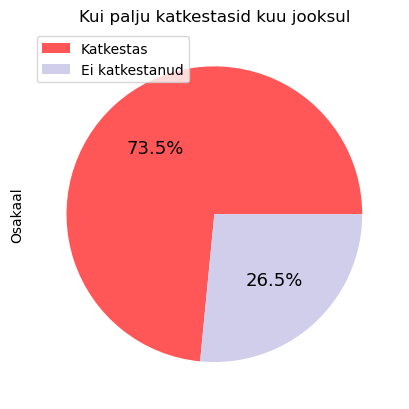

Antud joonisel on näha, et churn rate on üsna väike, 26.5%, seda saaks arvutada ka välja kasutades valemit, kuid meil on selle jaoks diagramm. 

Uurime tunnuse gender ja lahkumise statistilist sõltuvust:
Esmalt teeme sagedustabeli arvuliselt: 

Churn     No  Yes
gender           
Female  2549  939
Male    2625  930 

Järgnevalt ka protsentuaalselt: 

Churn      No    Yes
gender              
Female  73.08  26.92
Male    73.84  26.16 

Et paremini kinnitada, kas tunnus on sõltuvuses lahkumisega, teostame hii-ruut testi: 

Hii-ruut statistik: 0.4840828822091383
P-väärtus: 0.48657873605618596
Vabadusastmed: 1
Oodatud sagedused:
[[2562.38989067  925.61010933]
 [2611.61010933  943.38989067]] 

P-väärtus on suurem kui valitud olulisustase. Seega võtame vastu nullhüpoteesi, ehk gender ja lahkumine on statistiliselt sõltumatud.

Uurime tunnuse SeniorCitizen ja lahkumise statistilist sõltuvust:
Esmalt teeme sagedustabeli arvuliselt: 

Churn            No   Yes
SeniorCitizen            
0       

In [1]:
import pandas as pd
import tkinter as tk
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

#värvid soolistel graafikutel
soo_värvid = {"Female":(255/255, 182/255, 193/255), "Male":(135/255, 206/255, 235/255)}

#andmete sisselugemine
andmed = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

#kuna meie olukorras ei ole customerID'st kasu, droppime selle
andmed.drop('customerID', axis = 'columns', inplace = True)
#lisame väärtuse monthlycharges_categories, et sellega saaks analüüsi teha
andmed['MonthlyCharges_categories'] = pd.cut(andmed['MonthlyCharges'], bins=5)
#analüüsitavad tunnused
analüüsitavad_tunnused = ['gender', 'SeniorCitizen', 'MonthlyCharges_categories', 'Partner', 'Dependents']

#andmestiku ülesehitus
output = "\n Andmestiku tunnused:\n{}\nAndmestikus on {} veergu\n".format(andmed.columns, len(andmed.columns))
output += "\n Näidis andmestiku välimusest:\n{}\n\n".format(andmed.sample(5))
print(output)

print("Uurime järgnevaid tunnuseid: ", ", ".join(map(str, analüüsitavad_tunnused)))
#esmane analüüs, palju mehi/naisi, vanureid, paaris/üksikuid jne on osakaaluliselt andmestikus
#soo jaotus
print("\nKlientide sooline jaotus andmestikus on järgmine: ")
sood = andmed['gender'].value_counts()
sood.plot(kind = 'pie', colors = [soo_värvid[gender] for gender in sood.index], 
          fontsize = 13, autopct = '%.1f%%', labels = None)#plottime sektordiagrammi
plt.title("Sooline jaotus andmestikus")#pealkirja, legendi muutmine järgmised read
plt.legend(labels = {"Mees" : "Male", "Naine" : "Female"}, 
           loc = "best")
plt.xlabel('Sugu')
plt.ylabel('Osakaal')
plt.show()
print("On näha, et naised ja mehed jaotuvad üsnagi võrdselt\n") 

#vanurite jaotus
print("Kui suur osakaal klientidest on pensionärid?")
vanurid = andmed['SeniorCitizen'].value_counts()
vanurid.plot(kind = 'pie', colors = [(150/255, 182/255, 193/255), (90/255, 206/255, 235/255)], 
             fontsize = 13, autopct = '%.1f%%', labels = None)
plt.title("Vanurite jaotus andmestikus")
plt.legend(labels = {"Vanur" : 1, "Mitte vanur" : 0}, 
           loc = "best")
plt.ylabel('Osakaal')
plt.show()
print("\nNähtav, et antud firma kliendid on suuremjaolt pensionärid")

#partnerite jaotus
print("\nUurime ka kuidas jaotuvad partnerite ja ülalpeetavatega kliendid: ")
partnerid = andmed['Partner'].value_counts()
partnerid.plot(kind = 'pie', colors = [(150/255, 182/255, 193/255), (90/255, 206/255, 235/255)],
               fontsize = 13, autopct = '%.1f%%', labels = None)
plt.title("Partneritega inimeste jaotus andmestikus")
plt.legend(labels = {"Partneriga" : 1, "Üksi" : 0}, 
           loc = "best")
plt.ylabel('Osakaal')
plt.show()

#ülalpeetavatega jaotus
ylal = andmed['Dependents'].value_counts()
ylal.plot(kind = 'pie', colors = [(150/255, 182/255, 193/255), (90/255, 206/255, 235/255)],
               fontsize = 13, autopct = '%.1f%%', labels = None)
plt.title("Ülalpeetavatega inimeste jaotus andmestikus")
plt.legend(labels = {"Ülalpeetavatega" : 1, "Üksi" : 0}, 
           loc = "best")
plt.ylabel('Osakaal')
plt.show()
print("Kui partneriga ja partnerita kliendid jaotuvad üsnagi võrdselt, nagu ka sooline jaotus, siis teisel käel enamus klientidel on ülalpeetavad\n")

#kui suur osakaal on katkestanud andmestikus
print("On mõistlik ka vaadata, kui suur osa klientidest on üldse lahkunud viimase kuu jooksul, enne kui analüüsida\n")
katkestanud = andmed['Churn'].value_counts()
katkestanud.plot(kind = 'pie', colors = [(255/255, 87/255, 87/255), (208/255, 206/255, 235/255)],
               fontsize = 13, autopct = '%.1f%%', labels = None)
plt.title("Kui palju katkestasid kuu jooksul")
plt.legend(labels = {"Katkestas" : 1, "Ei katkestanud" : 0},
           loc = "best")
plt.ylabel('Osakaal')
plt.show()
print("Antud joonisel on näha, et churn rate on üsna väike, 26.5%, seda saaks arvutada ka välja kasutades valemit, kuid meil on selle jaoks diagramm. \n")
#churn rate = (kaotatud kliendid / kokku kliente) * 100, kuid meil on selle jaoks sektordiagramm, kust on näha, et churn rate on 26.5%


#Analüüs kas mõni tunnus mõjutab rohkem lahkumist või mitte
#analüüsi käigus uurime sõltuvusi soo, vanuse, kuumakse, partneri olemasolu ja ülalpeetavate olemasolu 

alpha = 0.05  # Valitud olulisusnivoo

#käime läbi iga analüüsitava tunnuse
sõltuvad = []
sõltumatud = []
for tunnus in analüüsitavad_tunnused:
    print("Uurime tunnuse", tunnus, "ja lahkumise statistilist sõltuvust:") 
    # Loome sagedustabeli
    print("Esmalt teeme sagedustabeli arvuliselt: \n")
    sagedus_arv = pd.crosstab(andmed[tunnus], andmed['Churn'])
    print(sagedus_arv, "\n")

    # Arvutame protsentuaalsed väärtused
    print("Järgnevalt ka protsentuaalselt: \n")
    sagedus_prot = round(sagedus_arv.div(sagedus_arv.sum(1), axis=0) * 100, 2)
    print(sagedus_prot, "\n")

    # Hii-ruut test
    print("Et paremini kinnitada, kas tunnus on sõltuvuses lahkumisega, teostame hii-ruut testi: \n")
    chi, p_value, dof, expected = chi2_contingency(sagedus_arv)

    # Prindime tulemused
    print("Hii-ruut statistik:", chi)
    print("P-väärtus:", p_value)
    print("Vabadusastmed:", dof)
    print("Oodatud sagedused:")
    print(expected, "\n")

    # Kontrollime hüpoteesi
    if p_value <= alpha:
        print("P-väärtus on väiksem kui valitud olulisustase. Seega võime järeldada, et", tunnus, "ja lahkumine on omavahel statistiliselt sõltuvad.\n")
        sõltuvad.append(tunnus)
    else:
        print("P-väärtus on suurem kui valitud olulisustase. Seega võtame vastu nullhüpoteesi, ehk", tunnus, "ja lahkumine on statistiliselt sõltumatud.\n")
        sõltumatud.append(tunnus)

sõltuv_välja = ", ".join(map(str, sõltuvad))
sõltum_välja = ", ".join(map(str, sõltumatud))
print("Seega võime öelda, et tunnused ", sõltuv_välja, "on statistiliselt sõltuvad lahkumisega, ning lahkuvad suurema tõenäosusega ning", sõltum_välja, "ei ole sõltuvuses lahkumisega.")
